          File  Class   X1   Y1   X2   Y2   X3   Y3   X4   Y4
0      001.tif      7  106  558  175  606  169  614  100  567
1      001.tif      5  278  150  345  136  347  146  280  160
2      001.tif      4  236  143  295  136  296  146  237  153
3      001.tif      3  358   94  382  140  373  145  350   99
4      001.tif      1  194  203  217  230  210  236  187  209
...        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...
39956  400.tif      7   17  446   46  525   36  528    7  449
39957  400.tif      4   11  469   24  528   14  530    1  472
39958  400.tif      2  130  500  164  529  158  536  124  508
39959  400.tif      6  548  808  616  775  621  784  553  817
39960  400.tif      5  468  801  535  812  534  821  467  811

[39961 rows x 10 columns]


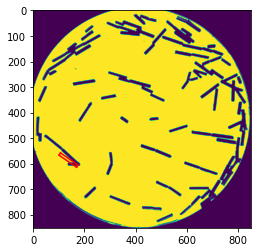

In [72]:
from os import listdir
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import pprint




label_path = "train_label.csv"
image_path = "./train_image"


# bounding box가 직사각형이 아님.
with open(label_path, 'r') as l:
    l = pd.read_csv(l)
#     print(l[l["File"] == "001.tif"])
    print(l)
# 001부터 400까지, 390..tif으로 되어있었음, 나머지 하나는 ipynb.checkpoint
# label은 39961, 한 장에 무려 평균 100개의 label이 있음.
#img는 852*852

img_list = listdir(image_path)

# for i in range(1,401):
#     name ="{0:0=3d}.tif".format(i)
#     img_list.remove(name)
    

# 시각화
idx = 50
point1 = [106, 558]
point2 = [175, 606]
point3 = [169, 614]
point4 = [100, 567]

x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]
x_values2 = [point2[0], point3[0]]
y_values2 = [point2[1], point3[1]]
x_values3 = [point3[0], point4[0]]
y_values3 = [point3[1], point4[1]]
x_values4 = [point1[0], point4[0]]
y_values4 = [point1[1], point4[1]]
img = plt.imread(osp.join(image_path, "{0:0=3d}.tif".format(idx)))
# print(img.shape)
plt.plot(x_values1, y_values1, color='red')
plt.plot(x_values2, y_values2, color='red')
plt.plot(x_values3, y_values3, color='red')
plt.plot(x_values4, y_values4, color='red')
plt.imshow(img)



# instance segmentation임
# 점 찍고 길이재서 경향보기 >> okay
# segmentation label 확인하고 만들기
# 학습하기 
    # >>그냥 단일 label instance segmentation으로
    # >> 또는 multiclass로 + 길이정보 활용
# 학습 결과 >> seg 나온 것에 점찍기 >> 점찍은 것을 바탕으로 길이재서 class 추측 
# 튜닝
# mAP, 720mb이하, iou로 하겠다는 것임!

    

    

In [36]:
with open(label_path, 'r') as l:
    l = pd.read_csv(l)
    l['s1'] = (((l['X1'] - l['X2'])**2 + (l['Y1'] - l['Y2'])**2)**0.5) ###
    l['s2'] = (((l['X2'] - l['X3'])**2 + (l['Y2'] - l['Y3'])**2)**0.5)
    l['s3'] = (((l['X3'] - l['X4'])**2 + (l['Y3'] - l['Y4'])**2)**0.5) ###
    l['s4'] = (((l['X4'] - l['X1'])**2 + (l['Y4'] - l['Y1'])**2)**0.5)
    
    sides = l[['s1', 's2','s3','s4']]
    maxValueIndex = sides.idxmax(axis = 1)
    print(maxValueIndex.value_counts())
    
    # 최대가 s1 아니면 s3임

    

s1    29072
s3    10889
dtype: int64


In [71]:
maxValues = sides.max(axis = 1)
print(maxValues)

label_list = []
for label in range(1,8):
    label_list.append(maxValues[l['Class']==label])
    
print("##########################################")
minmax_list = []
for lbl, lbl_set in enumerate(label_list):
    minval = lbl_set.min()/852
    maxval = lbl_set.max()/852
    minmax_list.append((minval,maxval))
    print(f"{lbl+1}: {minval},{maxval}")

print("##########################################")
for idx in range(1,len(label_list)):
    avg = (minmax_list[idx][0] + minmax_list[idx-1][1])*0.5
    print(f"{idx-1}~{idx}:",avg)
    
    
    
# 중간값에서 끊기



0        84.053554
1        68.447060
2        59.413803
3        51.884487
4        35.468296
           ...    
39956    84.154620
39957    60.415230
39958    44.687806
39959    75.584390
39960    67.896981
Length: 39961, dtype: float64
##########################################
1: 0.040675407162355535,0.04315675190340431
2: 0.05048312950142387,0.0531419315618393
3: 0.05935068957638747,0.06168395935901837
4: 0.06888981498041873,0.07154812513675197
5: 0.07829615061107004,0.08101992889869633
6: 0.08768320514375474,0.09001666426673245
7: 0.09727632687790361,0.09981357570642864
##########################################
0~1: 0.04681994070241409
1~2: 0.05624631056911339
2~3: 0.06528688716971855
3~4: 0.074922137873911
4~5: 0.08435156702122554
5~6: 0.09364649557231802
